In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
actual = pd.read_csv("../data/test_80_20.csv")
predictions = pd.read_csv('../data/results/test_20per_lr01_8020_split.csv')
actual.drop(columns=['timestamp'],inplace=True)

In [3]:
user = 'd1ca8b3e78811238cf94ee7caa1868d7ae9e908a'
pred_user = predictions[predictions['user_id'] == user]
user_counts = predictions['user_id'].value_counts()
print(user_counts[user_counts >= user_counts.quantile(.95)])
pred_user.info()
# for each user
# g = df.groupby(['user_id','track_id'])
# print(g.head())
# # # detect the top_5 % as predicted by your algorithm
# # top_5 = g.rating.transform(
# #     lambda x: x >= x.quantile(.95)
# # )

# return the mean of the actual score on those

d1ca8b3e78811238cf94ee7caa1868d7ae9e908a    31
621659a10f52dc4f8b50f205ab85b6d6b7d1b0dc    29
257fc9ff00cd0ac79f53c7d65510b2ebba0c6b8e    28
9e90e4fb797eecf729118f1830e21b530b6c8f8f    27
9e7cdcd7ba3f315eedce29477d4f00a7d5fdbdb5    27
                                            ..
60dfccb8a90d04a965819ba398b1b94a31150b79     5
f62b25724eb6acc6140e7d8dbc6a9f29377dc8bd     5
98c684697a53f9004a54fc5940577601492cd455     5
4df808413da3a0b22afba84f4d4d1d1905b80e7d     5
77e7b92774e95800e3a155672e7501fa5d671657     5
Name: user_id, Length: 25032, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 246021 to 246051
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   31 non-null     object 
 1   track_id  31 non-null     object 
 2   rating    31 non-null     float64
dtypes: float64(1), object(2)
memory usage: 992.0+ bytes


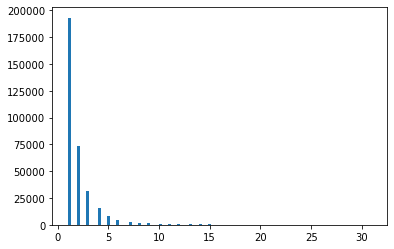

In [38]:
fig,ax = plt.subplots()
ax.hist(predictions['user_id'].value_counts(),100);

In [4]:
pred_user.sort_values('rating',ascending=False)

,user_id,track_id,rating
246041,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SORJICW12A8C13640D,0.388480
246034,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOLGLUC12AB018A8FA,0.361567
246044,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOUFTBI12AB0183F65,0.355536
246024,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOBONKR12A58A7A7E0,0.354942
246037,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOOFYTN12A6D4F9B35,0.352530
246028,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOEGIYH12A6D4FC0E3,0.337828
246042,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOTWNDJ12A8C143984,0.317425
246045,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOWEHOM12A6BD4E09E,0.308554
246026,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SODCNJX12A6D4F93CB,0.303605
246036,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SONQCXC12A6D4F6A37,0.298673


In [53]:
predictions['user_id'].shape

(686281,)

In [8]:
track_list = predictions['track_id'].unique()
track_list

array(['SODGVGW12AC9075A8D', 'SONYKOW12AB01849C9', 'SOWCKVR12A8C142411',
       'SOAFTRR12AF72A8D4D', 'SOMGVYU12A8C1314FF', 'SOBUBLL12A58A795A8',
       'SOBOAFP12A8C131F36', 'SOFRCGW12A81C21EA6', 'SOPSOHT12A67AE0235',
       'SOPTLQL12AB018D56F', 'SOULTKQ12AB018A183', 'SOVDLZN12AB0185BEA',
       'SOFRQTD12A81C233C0', 'SOTVLQY12A58A798C2', 'SODLLYS12A8C13A96B',
       'SOAXGDH12A8C13F8A1', 'SOBONKR12A58A7A7E0', 'SOTWSXL12A8C143349',
       'SOBADEB12AB018275F', 'SOCVTLJ12A6310F0FD', 'SOKLRPJ12A8C13C3FE',
       'SOUFPNI12A8C142D19', 'SOWEJXA12A6701C574', 'SOXNZOW12AB017F756',
       'SOXPFLM12A8AE48C50', 'SOAUWYT12A81C206F1', 'SOFLJQZ12A6D4FADA6',
       'SORJICW12A8C13640D', 'SOTCMDJ12A6D4F8528', 'SOADJQJ12A8C141D38',
       'SOQGVCS12AF72A078D', 'SOPAYPV12AB017DB0C', 'SOHYSXA12AB0186704',
       'SOUVTSM12AC468F6A7', 'SOISNSU12AC468C0D8', 'SOLGLUC12AB018A8FA',
       'SONNSYV12A8C146BEC', 'SOSZJFV12AB01878CB', 'SODJWHY12A8C142CCE',
       'SOSXLTC12AF72A7F54', 'SOVDSJC12A58A7A271', 

In [6]:
df_test = pd.DataFrame(columns = ['s1','s2','s3'], index = ['u1','u2'])
df_test

,s1,s2,s3
u1,NaN,NaN,NaN
u2,NaN,NaN,NaN


In [9]:
user_ids = ['d1ca8b3e78811238cf94ee7caa1868d7ae9e908a',
            '621659a10f52dc4f8b50f205ab85b6d6b7d1b0dc']

In [14]:
train_path = '../data/train_80_20.csv'
train = pd.read_csv(train_path)

model = pickle.load( open( "../data/model.p", "rb" ) )

In [25]:
track_list = train['track_id'].unique()

df = pd.DataFrame(columns = user_ids, index = track_list).reset_index()

df.head()

,index,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,621659a10f52dc4f8b50f205ab85b6d6b7d1b0dc
0,SODGJKH12AAA8C9487,NaN,NaN
1,SOUJVIT12A8C1451C1,NaN,NaN
2,SOWGXOP12A6701E93A,NaN,NaN
3,SOTCMDJ12A6D4F8528,NaN,NaN
4,SONYKOW12AB01849C9,NaN,NaN


In [43]:
request_data = pd.melt(df, id_vars = 'index', value_vars=user_ids)
request_data.rename(columns={'index': 'track_id', 'variable': 'user_id', 'value': 'rating'},inplace=True)
request_data = request_data[['user_id', 'track_id', 'rating']]
request_data['timestamp'] = 0

request_data.head()

,user_id,track_id,rating,timestamp
0,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SODGJKH12AAA8C9487,NaN,0
1,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOUJVIT12A8C1451C1,NaN,0
2,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOWGXOP12A6701E93A,NaN,0
3,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOTCMDJ12A6D4F8528,NaN,0
4,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SONYKOW12AB01849C9,NaN,0


In [151]:
predictions = model.transform(request_data)
predictions.head()

,user_id,track_id,rating
0,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SODGJKH12AAA8C9487,0.254036
1,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOUJVIT12A8C1451C1,0.307803
2,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOWGXOP12A6701E93A,0.230591
3,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOTCMDJ12A6D4F8528,0.308128
4,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SONYKOW12AB01849C9,0.244778


In [152]:
updated = predictions.merge(train, how='left', on=['user_id', 'track_id'],
                            suffixes=('', '_new'))
updated.drop(columns = ['Unnamed: 0','timestamp'],inplace=True)

updated['rating'] = np.where(pd.notnull(updated['rating_new']), updated['rating_new'], updated['rating'])

predictions = updated

predictions.head(20)

,user_id,track_id,rating,rating_new
0,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SODGJKH12AAA8C9487,0.238561,0.238561
1,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOUJVIT12A8C1451C1,0.238561,0.238561
2,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOWGXOP12A6701E93A,0.150515,0.150515
3,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOTCMDJ12A6D4F8528,0.389076,0.389076
4,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SONYKOW12AB01849C9,0.451545,0.451545
5,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOPXKYD12A6D4FA876,0.150515,0.150515
6,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOOFYTN12A6D4F9B35,0.336978,NaN
7,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOLFXKT12AB017E3E0,0.235383,NaN
8,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOEPZQS12A8C1436C7,0.231222,NaN
9,d1ca8b3e78811238cf94ee7caa1868d7ae9e908a,SOBONKR12A58A7A7E0,0.385736,NaN


In [153]:
predictions.drop('rating_new', axis=1, inplace=True)

In [154]:
dfs = []
for idx, user_id in enumerate(user_ids):
    sorted_by_rating = predictions[predictions['user_id'] == user_id].sort_values(
        by='rating',ascending=False).reset_index().drop(
        columns=['user_id','index']).reset_index().set_index('track_id')
    dfs.append(sorted_by_rating.rename(columns={'index':'rank'},inplace=True))
    if idx == 0:
        rankings = sorted_by_rating
    else:
        rankings = rankings.join(sorted_by_rating,rsuffix=str(idx+1))
print(rankings.head(20))

                    rank    rating  rank2   rating2
track_id                                           
SOSXLTC12AF72A7F54     0  0.738561     24  0.150515
SOSJRJP12A6D4F826F     1  0.588046     55  0.038964
SOPSOHT12A67AE0235     2  0.520696     32  0.102263
SOAUWYT12A81C206F1     3  0.477121     29  0.122063
SONYKOW12AB01849C9     4  0.451545     40  0.060834
SOPAYPV12AB017DB0C     5  0.451545     98  0.000000
SOUNZHU12A8AE47481     6  0.422549     61  0.000000
SOHFJAQ12AB017E4AF     7  0.422549     75  0.000000
SOBOUPA12A6D4F81F1     8  0.422549     33  0.101110
SOHTKMO12AB01843B0     9  0.422549     21  0.150515
SOVDSJC12A58A7A271    10  0.389076     28  0.130100
SOPUCYA12A8C13A694    11  0.389076     20  0.150515
SOVDLZN12AB0185BEA    12  0.389076     70  0.000000
SOTCMDJ12A6D4F8528    13  0.389076     77  0.000000
SOBONKR12A58A7A7E0    14  0.385736     13  0.212819
SORJICW12A8C13640D    15  0.353709     27  0.134120
SOLGLUC12AB018A8FA    16  0.352362     59  0.000000
SOUFTBI12AB0

In [157]:
n_songs = 5
rank_cols = [col for col in rankings.columns if 'rank' in col]

# Least misery strategy
rankings['worst_rnk'] = rankings[rank_cols].max(axis=1)

# Average rank strategy
rankings['avg_rnk'] = rankings[rank_cols].mean(axis=1)

# Most pleasure strategy
rankings['best_rnk'] = rankings[rank_cols].min(axis=1)

rankings.sort_values('worst_rnk')[:n_songs]

,rank,rating,rank2,rating2,worst_rnk,avg_rnk,best_rnk
track_id,,,,,,,
SOBONKR12A58A7A7E0,14,0.385736,13,0.212819,14,13.5,13
SOUFTBI12AB0183F65,17,0.350194,14,0.176995,17,15.5,14
SOUSMXX12AB0185C24,20,0.349485,2,0.301030,20,11.0,2
SOPUCYA12A8C13A694,11,0.389076,20,0.150515,20,15.5,11
SOHTKMO12AB01843B0,9,0.422549,21,0.150515,21,15.0,9


In [158]:
rankings.sort_values('avg_rnk')[:n_songs]

,rank,rating,rank2,rating2,worst_rnk,avg_rnk,best_rnk
track_id,,,,,,,
SOUSMXX12AB0185C24,20,0.349485,2,0.301030,20,11.0,2
SOSXLTC12AF72A7F54,0,0.738561,24,0.150515,24,12.0,0
SOBONKR12A58A7A7E0,14,0.385736,13,0.212819,14,13.5,13
SOHTKMO12AB01843B0,9,0.422549,21,0.150515,21,15.0,9
SOUFTBI12AB0183F65,17,0.350194,14,0.176995,17,15.5,14


In [159]:
rankings.sort_values('best_rnk')[:n_songs]

,rank,rating,rank2,rating2,worst_rnk,avg_rnk,best_rnk
track_id,,,,,,,
SOSXLTC12AF72A7F54,0,0.738561,24,0.150515,24,12.0,0
SOAXGDH12A8C13F8A1,47,0.250749,0,0.451545,47,23.5,0
SOSJRJP12A6D4F826F,1,0.588046,55,0.038964,55,28.0,1
SODJWHY12A8C142CCE,91,0.150515,1,0.389076,91,46.0,1
SOPSOHT12A67AE0235,2,0.520696,32,0.102263,32,17.0,2
